In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def sinc2D(x: np.ndarray, y: np.ndarray):
    sqrt = np.sqrt(np.power(x, 2) + np.power(y, 2));
    return np.sin(sqrt) / sqrt;

In [3]:
#https://stackoverflow.com/a/53816322/7976097
def plotImageNoResize(img: np.ndarray):
    dpi = mpl.rcParams['figure.dpi'];
    height, width, _ = img.shape;

    fig = plt.figure(figsize=(width / dpi, height / dpi))
    ax = fig.add_axes([0, 0, 1, 1])

    ax.axis('off')

    ax.imshow(img);

In [4]:
img = cv.imread("/home/johannes/Desktop/example_image_smoll.png");
img = cv.cvtColor(img, cv.COLOR_BGR2RGB);

In [5]:
double_size_img = np.zeros(shape=(img.shape[0] * 2, img.shape[1] * 2, img.shape[2]), dtype=np.float32);
double_size_img[::2, ::2, :] = img;

In [6]:
double_size_img_copy = double_size_img.copy();

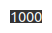

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


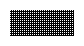

In [7]:
plotImageNoResize(img);
plt.show();
plotImageNoResize(double_size_img_copy);
plt.show();

In [8]:
#all image coordinates that do not have values from the old image
new_x_indices = [];
new_y_indices = [];

old_x_indices = [];
old_y_indices = [];

for x in range(double_size_img.shape[0]):
    for y in range(double_size_img.shape[1]):
        if (x % 2 != 0 or y % 2 != 0):
            new_x_indices.append(x);
            new_y_indices.append(y);
        else:
            old_x_indices.append(x);
            old_y_indices.append(y);

In [9]:
#sanity check: this sum should only ever evaluate to 0 since we aim to add only 0 fields
assert np.sum(double_size_img[new_x_indices, new_y_indices, :]) == 0

In [10]:
new_x_indices = np.array(new_x_indices);
new_y_indices = np.array(new_y_indices);

In [11]:
for old_x in old_x_indices:
    for old_y in old_y_indices:
        for channel in range(double_size_img.shape[2]):
            double_size_img[new_x_indices, new_y_indices, channel] = \
                np.sum(
                    double_size_img[old_x, old_y, channel] * \
                        sinc2D(
                            np.pi/2 * (new_x_indices - old_x),
                            np.pi/2 * (new_y_indices - old_y)
                        )
                )

In [12]:
double_size_img = (255 * double_size_img / np.max(double_size_img)).astype(np.uint8);

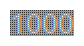

In [13]:
plotImageNoResize(double_size_img);
plt.show();

In [14]:
cv.imwrite("spaced_out.png", double_size_img_copy);
cv.imwrite("interpolated.png", double_size_img);

In [15]:
np.unique(double_size_img[new_x_indices, new_y_indices, 0])

array([157], dtype=uint8)